<a href="https://colab.research.google.com/github/Fr33zz/mw/blob/master/17%20scoring_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Columns


In [ ]:
cols = \
[#'id',
 'state',
 'complete',
 'after4',
 'amount',
 'initial_payment_amount',
 'masked_credit_agreement_id',
 #'agreement_type',
 'phone',
 'email', 
 'created_at',
 'created_at_time',
 'updated_at',
 'expires_at',
 #'address_id',
 #'local_passport_id',
 #'international_passport_id',
 'partner_id',
 'user_id',
 #'credit_card_id',
 'web_mode',
 'partner_request',
 #'agreement',
 #'id.1',
 #'type',
 ##'agr_state',
 #'total_amount',
 #'masked_id',
 #'opened_at',
 #'closed_at',
 #'cancelled_at',
 #'created_at.1',
 #'updated_at.1',
 ##'paused_at',
 ##'payment_schedule_info',
 #'credit_application_id',
 #'user_id.1',
 #'initial_payment_invoice_id',
 #'documents_signed',
 #'andgo_id',
 #'fraud',
 #'users',
 #'id.2',
 'phone.1',
 #'created_at.2',
 #'updated_at.2',
 #'primary_credit_card_id',
 #'last_name',
 #'first_name',
 #'middle_name',
 #'profile_form_data',
 #'email.1',
 #'andgo_id.1',
 #'imported_at',
 #'source',
 #'deleted_at',
 'local_passports',
 #'id.3',
 'last_name.1',
 'first_name.1', 
 'middle_name.1',
 'number', #passport
 'birth_date',
 'issue_date',
 'authority_code',
 'birth_place',
 'issuing_authority',
 'sex',
 'created_at.3',
 'updated_at.3',
 #'imported_at.1',
 #'deleted_at.1',
 #'international_passports',
 'id.4', #international_passport_id
 'last_name.2',
 'first_name.2',
 'number.1',
#'birth_date.1',
 'issue_date.1',
 'expiration_date',
 'issuing_authority.1',
 #'country_code',
 #'created_at.4',
 #'updated_at.4',
 #'imported_at.2',
 #'deleted_at.2',
 #'addresses',
 'id.5',
 'city',
 'street',
 'building',
 'housing',
 'apartment',
 'postcode',
 #'created_at.5',
 #'updated_at.5',
 #'imported_at.3',
 #'raw_address',
 #'raw_postcode',
 #'credit_cards',
 #'id.6',
 'number.2', 
 'expiration_date.1',
 'holder_name',
 #'active',
 #'user_id.2',
 #'created_at.6',
 #'updated_at.6',
 #'fingerprint',
 #'imported_at.4',
 #'andgo_id.2',
 'duplicate',
 'deleted_at.3',
 'global_card_id',
 #'unlocked_at',
 #'locked_at',
 #'geolocations',
 'id.7', #geo id
 #'credit_application_id.1',
 'country',
 'state.1',
 'city.1',
 'street.1',
 'house_number',
 'position_human',
 #'created_at.7',
 #'updated_at.7',
 #'latitude',
 #'longitude',
 #'deleted_at.4',
 'DISBURSED',
 'AMOUNT',
 'SOCIAL_DEFAULT',
 'FRAUD_DEFAULT'
 ]


# intro

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from datetime import date
import datetime
import json

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
orders = gc.open_by_url('https://docs.google.com/spreadsheets/d/106Mk7_n9iXmCB-fuPFgpWsV1t7JtoAdPaePi5x8BFTM')

payments = gc.open_by_url('https://docs.google.com/spreadsheets/d/1OKkFUxN-a55K52Z6QO0wnZg9SB-_6d3VZ_BXDCYsGYc')

closed = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Gs7OkvQLNpt5IDTrsP5PBWbrSTO89zOPysbpbp7uzrQ')

sch_pay = gc.open_by_url('https://docs.google.com/spreadsheets/d/1AkH2q9AGbFuaXW3fUlrvvzcObFAr0vOkYdr2sNb4uLw')

opened = gc.open_by_url('https://docs.google.com/spreadsheets/d/1xUc4ayCcVNpkT1Bcx8_Hk84g02iM3U5GkxSSbZMMGAk')

charge = gc.open_by_url('https://docs.google.com/spreadsheets/d/1gOgXDjkxdjNaE-O-jprV77Tucdqm8uE-vg0NHDxP8xk')

partners = gc.open_by_url('https://docs.google.com/spreadsheets/d/1iLbCMeMZ19wpOyVZCVUUvXKVdRYLveNwrsr6FoJ5FJQ')

regions = gc.open_by_url('https://docs.google.com/spreadsheets/d/1L6DcvBOZzLf3dwdlGZMcuuFBLYHEDNPUTDQTGRAR1ZQ')

def get_data(spreadsheet, list_number=0):
  ind = pd.DataFrame(spreadsheet.worksheets()[list_number].get_all_values())
  ind = ind.rename(columns=ind.iloc[0]).drop(index=0).reset_index().drop(columns='index')
  return ind

def get_titles(x, type_=1):
  '''type = {0:"list", 1:"df"}'''
  if type_==0:
    return [i.title for i in x.worksheets()]
  if type_==1:
    return pd.DataFrame([i.title for i in x.worksheets()])


def to_num(data, columns, print_=False, list_=False):
  d = data.copy()
  l = []
  for i in columns:
    try:       
      if len(d[i].shape)==1:
        d[i] = d[i].map(lambda x: str(x) if x!='' and x==x else np.nan)
        d[i] = d[i].map(lambda x: '.'.join(x.split(','   )) if x!='' and x==x else np.nan)
        d[i] = d[i].map(lambda x:  ''.join(x.split(' '   )) if x!='' and x==x else np.nan)
        d[i] = d[i].map(lambda x:  ''.join(x.split('\xa0')) if x!='' and x==x else np.nan)
      if len(d[i].shape)==2:
        d[i] = d[i].applymap(lambda x: str(x) if x!='' and x==x else np.nan)
        d[i] = d[i].applymap(lambda x: '.'.join(x.split(','   )) if x!='' and x==x else np.nan)
        d[i] = d[i].applymap(lambda x:  ''.join(x.split(' '   )) if x!='' and x==x else np.nan)
        d[i] = d[i].applymap(lambda x:  ''.join(x.split('\xa0')) if x!='' and x==x else np.nan)
      
      d[i] = d[i].astype('float')
    except:
      l.append(i)
      if print_:
        print(print_,' : ', i)
      else:
        None
  if list_:
    return l, d
  else:
    return d


def to_dates(data, columns, print_=False, list_=False):
  d = data.copy()
  l = []
  for i in columns:
    try:
      
      d[i] = d[i].replace({'':np.nan})
      d[i] = d[i].str.split('T').map(lambda x: x[0] if x==x else x)
      #d[i] = d[i].str.split('-').map(lambda x: int(x[2]) if x==x else x)
      #d[i] = pd.to_datetime(d[i], format='%Y-%m-&d')
      d[i] = pd.to_datetime(d[i])
    
    except:
      l.append(i)
      if print_:
        print(print_, ' : ', i)
  if list_:
    return l, d
  else:
    return d

#for i in dates:
#  d[i] = pd.to_datetime(d[i].replace({'':np.nan}), format='%d.%m.%Y')

# 2 megafon



In [ ]:
#ord = get_data(orders, 0)

#clos = pd.concat([get_data(closed, i) for i in [0,2,4,5,6,7]])

#pay = get_data(payments, 0)
#legal = get_data(payments, 3)

#opn = get_data(opened, 0)
#loan = get_data(opened, 0)
#claim = get_data(opened, 1)

home = '/content/drive/My Drive/analytics/17 new scoring/'
mw0 = pd.read_csv(home+'data2scoring.csv')
at0 = pd.read_csv(home+'data2scoring_AT.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29,32,52,60,63,73,74,75,76,77,78,79,80,81,82,91,96,108,113,114,118,119,120,121,122,123,124,125) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
mw0['created_at_time'] = pd.to_datetime(mw0['created_at']).dt.time

In [ ]:
#cold[0].str.split('_id').map(len).unique()
#cold[cold[0].str.split('amount').map(len)==2]

cold = pd.DataFrame(mw0.columns)
cold['mw'] = True
cold = pd.concat([cold, pd.DataFrame([at0.columns,
                                      np.full(at0.shape[1], True)],
                                     index=[0,'at']).T,])\
      .reset_index().drop(columns='index')

cold = cold.fillna(False)

dd = {'date':['_at', '_date', 'date_', '_dt'],
      'num':['amount', 'id'],
      'string':['state', 'phone', 'email', 'type', 'address', 'name',
                'passport', 'masked'],
      'json':['scoring_data', 'application_info', 'collected_data',
              'partner_request', 'payment_schedule_info', 'address'],
      'tables':['agreement', 'users', ]}

def set_type(data, names_col, type_dict):
  try:
    for i in type_dict:
      data[i] = False
      for j in type_dict[i]:
        data.loc[data[data[names_col].str.split(j).map(len)==2].index, i] = True
    return data
  except:
    print('smth went wrong')
    return -1

cold = set_type(cold, 0, dd)
cold['counter'] = cold.iloc[:,2:].sum(axis=1)
cold.loc[cold[cold['counter']==2].index,'string'] = False
cold['counter'] = cold.iloc[:,2:-1].sum(axis=1)
cold['cols'] = cold[0].isin(cols)

In [ ]:
mw0 = to_num(mw0, cold[cold['mw'] & cold['num']][0].values, False)
at0 = to_num(at0, cold[cold['at'] & cold['num']][0].values, False)

In [ ]:
mw0 = to_dates(mw0, cold[cold['mw']&cold['date']][0].values, False)
at0 = to_dates(at0, cold[cold['at']&cold['date']][0].values, False)

In [ ]:
at0['postal_code'] = at0['address'].str.split('postal_code').\
    map(lambda x: x[1][3:9] if x==x and len(x)==2 else np.nan)

ind = at0[at0['phone'].isna()].index
at0.loc[ind, 'phone'] = at0.loc[ind, 'phone.1']

ind = at0[at0['birthday'].isna()].index
at0.loc[ind, 'birthday'] = at0.loc[ind, 'date_of_birth']

ind = at0[at0['building'].isna()].index
at0.loc[ind, 'building'] = at0.loc[ind, 'house_number']

at0['phone'] = at0['phone'].map(lambda x: str(int(x)) if x==x else np.nan)
mw0['postcode'] = mw0['postcode'].map(lambda x: str(int(x)) if x==x else np.nan)

mw0['DISBURSED'] = mw0['agr_state'].notna().map(lambda x: 1 if x else 0)
at0['DISBURSED'] = at0['state'].isin(['closed', 'open']).map(lambda x: 1 if x else 0)

mw0['AMOUNT'] = mw0['initial_payment_amount']*5/2
at0['AMOUNT'] = at0['first_payment_amount']*5/2

at0['SOCIAL_DEFAULT'] = (at0['state']=='open').map(lambda x: 1 if x else 0)
mw0['SOCIAL_DEFAULT'] = (mw0['agr_state']=='open')&(mw0['created_at'] < datetime.datetime.today() - datetime.timedelta(60))
mw0['SOCIAL_DEFAULT'] = mw0['SOCIAL_DEFAULT'].map(lambda x: 1 if x else 0)

mw0['FRAUD_DEFAULT'] = mw0['SOCIAL_DEFAULT']*((datetime.datetime.today() - mw0['created_at']).dt.days > 365)
at0['FRAUD_DEFAULT'] = at0['SOCIAL_DEFAULT']*((datetime.datetime.today() - at0['created_at']).dt.days > 365)

In [ ]:
at0['first_payment_amount'].map(type).unique()

array([<class 'float'>], dtype=object)

In [ ]:
cmw = [i for i in 'after4, state, agr_state, initial_payment_amount, masked_credit_agreement_id, \
phone, created_at, closed_at, paused_at, birth_date, sex, city, street, building, \
housing, apartment, postcode, partner_id, DISBURSED'.split(', ')]

cat = [i for i in 'after4, state, created_at, masked_id, first_payment_amount, \
phone, birthday, postal_code, apartment, city, street, \
house_number, sex, DISBURSED'.split(', ')]

In [ ]:
cmw = {#'after4': '',
 'masked_credit_agreement_id': 'ID',
 'created_at': 'DATE_APP',
 'phone': 'MOB_NUM',
 'AMOUNT':'AMOUNT',
 'DISBURSED':'DISBURSED',
 'SOCIAL_DEFAULT':'SOCIAL_DEFAULT',
 'FRAUD_DEFAULT':'FRAUD_DEFAULT',
 'partner_id': 'CHANNEL_ID',
 'postcode': 'HOME_ZIP',
 'building': 'HOME_HOUSE',
 'street': 'HOME_STREET',
 'city': 'HOME_CITY',
 'birth_date': 'DATE_OF_BIRTH'}



cat = {#'after4': '',
 'masked_id': 'ID',
 'created_at': 'DATE_APP',
 'phone': 'MOB_NUM',
 'AMOUNT':'AMOUNT',
 'DISBURSED':'DISBURSED',
 'SOCIAL_DEFAULT':'SOCIAL_DEFAULT',
 'FRAUD_DEFAULT':'FRAUD_DEFAULT',
 'postal_code': 'HOME_ZIP',
 'house_number': 'HOME_HOUSE',
 'street': 'HOME_STREET',
 'city': 'HOME_CITY',
 'birthday': 'DATE_OF_BIRTH'}


# preprocessing


In [ ]:
#функция получени типа города

def city_type_(data, col):
  city_type = {
      col+'_mos_flag':['москва', 'moscow']
      ,'spb_flag':['петербург', 'peterburg']
      ,'kzn_flag':['казань', 'kazan']
      ,'ekb_flag':['екатеринбург', 'свердловско', 'ekaterinburg', 'sverdlovsk']
      ,'nov_flag':['новгород', 'novgorod']
      ,'nvs_flag':['новосибирск', 'novosibirsk']
      ,'city_flag':['г.', 'гор.', 'город', ' г ', 'обнинск', 'омск', 'тюмень', 'краснодар', 'уфа', 'красноярск',\
                    'сургут', 'нальчик', 'иркутск', 'хабаровск', 'калининград', 'ноябрьск', 'челябинск', 'самара',\
                    'тольятти', 'барнаул']
      ,'selo_flag':[' с.', ' дер.', ' д ', 'село ', ' д.', 'станица ', 'хутор ', 'населенный пункт ', ' ст ', 'деревня', 'c ', 'аул ']
      ,'town_flag':[' пос', 'п.', ' г.п ', ' пгт ', ' рп.', ' поселок ', ' пос.', ' поселок городского типа ', ' рабочий поселок ', ' посёлок ']
      #,'town_flag_z':['пос', ' п.', ' г.п ', 'пгт ', ' рп.', 'поселок ', ' пос.', 'поселок городского типа ', 'рабочий поселок ', 'посёлок ']
  }

  for i in city_type:
    data[i] = sum([data[col].str.split(j).map(len)>1 for j in city_type[i]])>0
  data[col+'_entries'] = data.loc[:,city_type.keys()].sum(axis=1)

  return 0


# здесь идет получение словаря типов городов
#d['city'] = d['city'].fillna('').str.lower()
#
#ct = {}
#
#for line in d[d['city'].str.split(',').map(len)==1]['city'].values:
#  for i in line.split(' '):
#    try:
#      ct[i] = ct[i]+1
#   except:
#      ct[i] = 1
#
#pd.DataFrame(ct.items()).sort_values(1, ascending=False).iloc[420:480,:]

In [ ]:
def fs(x, funcs, val='fuck_u'):
  if len(funcs)==0:
    return val
  for i in funcs:
    try:
      return i(x)
    except:
      pass
  return val


def dep_time(x):
  def f(x, key):
    l = []
    for i in x:
      try:
        l.append(i[key])
      except:
        pass
    return l
  
  fl = [
        lambda x: [x['departure_time']],
        lambda x: f(x['product']['segments'][0]['flights'], 'departure_dt'),
        lambda x: f(x['product']['segments'][0]['routes'], 'departure_dt'),
        lambda x: f(x['product']['accommodations'], 'checkin_date'),
        lambda x: [x['departure_date']],
        lambda x: [x['cruises']['start_dt']]
  ]
  return fs(x, fl, np.nan)

In [ ]:
def routes(x):
  def f(x, k1, k2):
    l = []
    for i in x:
      try:
        l.append((i[k1], i[k2]))
      except:
        pass
    return l

  def f1(x):
    try:
      t = ','.join(x['description'].split('Авиабилеты')[1].split(',')[:-1])
      t = ['|'.join(i.split(',')) for i in t.split(' - ')]
      t = [i[1:] if i[0]==' ' else i for i in t]
      t = [i[:-1] if i[-1]==' ' else i for i in t]
      return [tuple([t[i],t[i+1]]) for i in range(len(t)-1)]
    except:
      return np.nan

  fl = [
        lambda x: f(x['raw_data']['routeList'], 'departure', 'arrival'),
        lambda x: f(x['product']['segments'][0]['flights'], 'orig', 'dest'),
        lambda x: f(x['product']['segments'][0]['routes'], 'from_station', 'to_station'),
        lambda x: f1(x),
        lambda x: [x['airports'].split('|')[0],x['airports'].split('|')[1]],
  ]
  return fs(x, fl, np.nan)

In [ ]:
ftype = {
  #segments - азимут, билетикс, связной
  'abs': [2, 14, 32, 19],
  #descrition – остальные
  'all': [4, 12, 31, 9, 10, 21, 11, 15, 23, 6, 28],
  #other
  'oth': [46,  18, 20, 3, 33, 38, 39, 45, 7, 44, 30, 41, 34, 48],
  'ant': [5],
  'train': [27]
  }

f_type = {}
for k in ftype:
  for v in ftype[k]:
    f_type[v] = k

def first_dep_dt(x):
  try:
    t = [pd.to_datetime(i).date() for i in x]
    return min(t)
  except:
    return np.nan

def days_b4_dp(x):
  x1 = x['first_dep_dt']
  x2 = x['created_at']
  try:
    t = (x1-x2).days
    if t<0:
      return np.nan
    else:
      return t
  except:
    return np.nan

def points(x):
  try:
    return list({j:1 for i in x for j in i}.keys())
  except:
    return np.nan

In [ ]:
def get_counts(data, cols, ind):
  for i in cols:
    data = pd.merge(left=data,
                    right=data.groupby(i).agg({ind:'count'})
                    .reset_index().rename(columns={ind:'c_'+i}),
                    how='left', on=i)
  
  data = pd.merge(left = data,
                  right = data.reset_index().groupby(ind).agg({'index':'count'})\
                  .reset_index().reset_index(), how='left', on=ind)\
                  .rename(columns={ind:ind+'_', 'index':'c_'+ind, 'level_0':ind})

  return data

In [ ]:
d = mw0[mw0['complete'].notna()&mw0['after4']][cols]
d['partner_id'] = d['partner_id'].astype(int)

# здесь новые фичи
d['fio'] = d[['first_name.1', 'middle_name.1','last_name.1']].\
            apply(lambda x: ' '.join([str(i) for i in x]), axis=1)

d['new_ind'] = d[['email', 'phone', 'number.2', 'last_name.1', 'first_name.1']].\
                apply(lambda x: '||'.join([str(i) for i in x]), axis=1)

cols2count = ['number.2', 'fio', 'phone.1' , 'email',  'phone', 'number', 'number.1']
d = get_counts(d, cols2count, 'new_ind')

d['zagran'] = d['number.1'].notna()
d['weekday'] = d['created_at'].dt.weekday
d['created_at_weekn'] = pd.to_datetime(d['created_at']).dt.week
d['hour'] = d['created_at_time'].map(lambda x: x.hour)
d['isgeo'] = d['position_human'].notna()
d['phone_code'] = d['phone'].map(lambda x: str(x)[1:4])
d['phone_concur'] = d[['phone', 'phone.1']].apply(lambda x: float(x['phone'])== x['phone.1'], axis=1)
d['phone_code_concur'] = d[['phone', 'phone.1']].applymap(lambda x: str(x)[1:4]).apply(lambda x: int(x['phone'])==int(x['phone.1']), axis=1)
for i in ['city', 'birth_place']:
  d[i] = d[i].fillna('').str.lower()
  city_type_(d, i)

d = pd.merge(left=d, right=get_data(regions),\
    left_on='postcode', right_on='INDEX', how='left',\
    indicator=True).drop(columns='INDEX').rename(columns={'_merge':'region_merge'})

reg_m = {'left_only':1, 'both':0, 'right_only':2}
d['region_merge'] = d['region_merge'].map(lambda x: reg_m[x] if x==x else np.nan)

d = pd.merge(left = d,
            right = pd.DataFrame(d.value_counts('REGION'))\
            .reset_index().reset_index()\
            .rename(columns={0:'count_regions', 'index':'region_index'}),
            how = 'left', on = 'REGION')


d = pd.merge(left=d, right=pd.read_excel(home+'partners.xlsx'),\
             how='left', left_on='partner_id', right_on='id',\
             indicator=True).drop(columns='id').rename(columns={'_merge':'partner_merge'})

part_tp = {v:i for i,v in enumerate(d['partner_type'].unique())}
d['partner_type_int'] = d['partner_type'].map(part_tp)
d['partner_type2'] = d['partner_id'].map(lambda x: f_type[int(x)])
d['partner_request'] = d['partner_request'].map(lambda x: json.loads(x) if x==x else x)
d['dep_time'] = d['partner_request'].map(dep_time)
d['routes'] = d['partner_request'].map(routes)
d['count_flights'] = d['routes'].map(lambda x: len(x) if x==x else np.nan)
d['points'] = d['routes'].map(points)

d['first_dep_dt'] = d['dep_time'].map(first_dep_dt)
d['first_dep_dt_weekn'] = pd.to_datetime(d['first_dep_dt']).dt.week
d['created_at'] = pd.to_datetime(d['created_at']).dt.date
d['days_b4_dp'] = d[['first_dep_dt','created_at']].apply(days_b4_dp, axis=1)

d['sex'] = d['sex'] == 'male'
d['web_mode'] = d['web_mode'] == 'standalone'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [ ]:
d.to_csv(home+'data_p.csv')

In [ ]:
d

,state,complete,after4,amount,initial_payment_amount,masked_credit_agreement_id,phone,email,created_at,created_at_time,updated_at,expires_at,partner_id,user_id,web_mode,partner_request,phone.1,local_passports,last_name.1,first_name.1,middle_name.1,number,birth_date,issue_date,authority_code,birth_place,issuing_authority,sex,created_at.3,updated_at.3,id.4,last_name.2,first_name.2,number.1,issue_date.1,expiration_date,issuing_authority.1,id.5,city,street,...,c_number,c_number.1,new_ind,c_new_ind,zagran,weekday,created_at_weekn,hour,isgeo,phone_code,phone_concur,phone_code_concur,city_mos_flag,spb_flag,kzn_flag,ekb_flag,nov_flag,nvs_flag,city_flag,selo_flag,town_flag,city_entries,birth_place_mos_flag,birth_place_entries,REGION,region_merge,region_index,count_regions,partner_name,partner_type,partner_merge,partner_type_int,partner_type2,dep_time,routes,count_flights,points,first_dep_dt,first_dep_dt_weekn,days_b4_dp
0,approved,True,True,7690.0,3076.0,MW333333393,79032829262,pupsoidcorp@gmail.com,2017-04-20,07:39:07.636255,2017-08-21,NaN,2,4.0,False,"{'ip': '', 'rloc': 'SFJAWI/1S', 'email': 'pups...",7.903283e+10,local_passports,Кукушкин,Николай,Владимирович,45 02 488328,1981-12-04,2002-03-05,772-017,гор. калуга,"ОВД ""Бескудниково"" гор. Москвы",True,2017-04-20,2017-04-20,7.0,Kukushkin,Nikolay,729268774,2014-08-14,2024-08-14,ФМС 77001,26.0,москва,Бескудниковский бульвар,...,2,19.0,7973,21,True,3,16,7,False,903,True,True,True,False,False,False,False,False,True,False,False,1,False,1,МОСКВА,0,0.0,1518.0,Biletix,avia,both,0,abs,[],"[(Москва| Шереметьево, Минск| Минск-2), (Минск...",2.0,"[Москва| Шереметьево, Минск| Минск-2]",NaT,NaN,NaN
1,approved,True,True,7690.0,3076.0,MW333333393,79032829262,pupsoidcorp@gmail.com,2017-04-20,07:39:07.636255,2017-08-21,NaN,2,4.0,False,"{'ip': '', 'rloc': 'SFJAWI/1S', 'email': 'pups...",7.903283e+10,local_passports,Кукушкин,Николай,Владимирович,45 02 488328,1981-12-04,2002-03-05,772-017,гор. калуга,"ОВД ""Бескудниково"" гор. Москвы",True,2017-04-20,2017-04-20,7.0,Kukushkin,Nikolay,729268774,2014-08-14,2024-08-14,ФМС 77001,26.0,москва,Бескудниковский бульвар,...,2,19.0,7973,21,True,3,16,7,False,903,True,True,True,False,False,False,False,False,True,False,False,1,False,1,МОСКВА,0,0.0,1518.0,Biletix,avia,both,0,abs,[],"[(Москва| Шереметьево, Минск| Минск-2), (Минск...",2.0,"[Москва| Шереметьево, Минск| Минск-2]",NaT,NaN,NaN
2,approved,True,True,14903.0,5465.0,MW333333321,79032829262,pupsoidcorp@gmail.com,2017-05-22,18:48:49.055549,2017-08-21,NaN,2,4.0,True,"{'ip': '', 'rloc': 'UPJ6OQ/1A', 'email': 'pups...",7.903283e+10,local_passports,Кукушкин,Николай,Владимирович,4502488328,1981-12-03,2002-03-04,772017,гор. калуга,"ОВД ""Бескудниково"" гор. Москвы",True,2017-05-22,2017-05-22,10.0,Kukushkin,Nikolay,729268774,2014-08-13,2024-08-13,ФМС 77001,37.0,москва,Бескудниковский бульвар,...,9,19.0,7973,21,True,0,21,18,False,903,True,True,True,False,False,False,False,False,True,False,False,1,False,1,МОСКВА,0,0.0,1518.0,Biletix,avia,both,0,abs,[],"[(Москва| Шереметьево, Вена| Vienna Intl), (Ве...",2.0,"[Москва| Шереметьево, Вена| Vienna Intl]",NaT,NaN,NaN
3,approved,True,True,16822.0,6169.0,MW333333438,79032829262,ludmilarad@gmail.com,2017-05-23,23:13:05.440866,2017-08-21,NaN,2,4.0,True,"{'ip': '', 'rloc': 'ЦФЛ4К6/1H', 'email': 'ludm...",7.903283e+10,local_passports,Зодер,Людмила,Михайловна,4613138736,1982-12-06,2013-06-14,500156,с. красноармейское красноармейского р-на куйбы...,ТП №1 МЕЖРАЙОННОГО ОУФМС РОССИИ ПО МОСКОВСКОЙ ...,False,2017-05-23,2017-05-23,11.0,Soder,Liudmila,730854200,2013-07-17,2023-07-17,ФМС 50032,39.0,"московская область, серпуховский р-н, дер. вас...",-,...,2,2.0,6283,2,True,1,21,23,False,903,True,True,False,False,False,False,False,False,True,False,False,2,False,1,МОСКОВСКАЯ ОБЛАСТЬ,0,1.0,869.0,Biletix,avia,both,0,abs,[],"[(Мюнхен| Franz Josef Strauss, Москва| Внуково...",2.0,"[Мюнхен| Franz Josef Strauss, Москва| Внуково]",NaT,NaN,NaN
4,approved,True,True,21267.0,7798.0,MW333333439,79032829262,lud

# model


In [ ]:
#!pip install catboost

In [ ]:
from sklearn.metrics import  roc_auc_score, roc_curve, accuracy_score, classification_report

from scipy.stats import uniform, randint

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, BaggingClassifier,
                              RandomForestRegressor)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, ParameterGrid, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RepeatedKFold

from sklearn.decomposition import PCA

import xgboost as xgb
#from catboost import Pool, CatBoostClassifier
import lightgbm as lgb

In [ ]:
d = pd.read_csv(home+'data_p.csv')

res0 = pd.merge(left = pd.read_csv(home+'data2megafon.csv'),
                right = pd.read_csv(home+'result.response.csv'),
                how='outer', left_on='ID',
                right_on='id', indicator=True)

res = pd.merge(left = d,
               right = pd.read_csv(home+'result.response.csv'),
               left_on='masked_credit_agreement_id',
               right_on='id',
               how='left', indicator=True)

#roc_auc_score(y_score=res0['SCORE1'].fillna(1), y_true=res0['SOCIAL_DEFAULT'])
roc = \
pd.DataFrame(roc_curve(y_score=res0['SCORE1'].fillna(1),
                       y_true=res0['SOCIAL_DEFAULT']))\
                       .T.rename(columns={0:'fpr', 1:'tpr', 2:'t'})

#plt.plot(roc['t'], roc['fpr'])
#plt.plot(roc['t'], 1-roc['tpr'])

s = '''
initial_payment_amount, created_at_weekn, partner_id, sex, web_mode 
,DISBURSED
,SOCIAL_DEFAULT, FRAUD_DEFAULT 
,new_ind, c_number.2, c_fio, c_phone.1, c_email, c_phone, c_number, c_number.1, c_new_ind, zagran 
,weekday, hour, isgeo, phone_code, phone_concur, phone_code_concur 
,count_regions, region_index, region_merge, partner_type_int, count_flights, first_dep_dt_weekn, days_b4_dp 
,city_mos_flag, spb_flag, kzn_flag, ekb_flag, nov_flag, nvs_flag, city_flag, selo_flag, town_flag 
,city_entries, birth_place_mos_flag, birth_place_entries 
,SCORE1, SCORE2, SCORE3, SCORE4, SCORE5, SCORE6
,ALL_CLC, BIN1, BIN2, BIN3, BIN4, BIN5, BIN6, BIN7, BIN8, BIN9, BLOCK_CNT, BLOCK_DUR, CIRCLE, LIFETIME_BIN, PAY_MAX 
'''

cls = ''.join(''.join(s.split(' ')).split('\n')).split(',')
t = res[cls].replace(np.nan, -10)

X_full = t.loc[:, ~t.columns.isin(['SOCIAL_DEFAULT', 'FRAUD_DEFAULT'])]
y_full = t['SOCIAL_DEFAULT']
#y_full = t['FRAUD_DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, 
                                                    test_size=0.3,
                                                    stratify=y_full, 
                                                    random_state=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,25,32,33,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
params = {'bootstrap': [True],
          'ccp_alpha': [0.0],
          'class_weight': [None],
          'criterion': ['gini'],
          'max_depth': [None],
          'max_features': ['auto'],
          'max_leaf_nodes': [None],
          'max_samples': [None],
          'min_impurity_decrease': [0.0],
          'min_impurity_split': [None],
          'min_samples_leaf': [1],
          'min_samples_split': [2],
          'min_weight_fraction_leaf': [0.0],
          'n_estimators': [100],
          'n_jobs': [-1],
          'oob_score': [False],
          'random_state': [42],
          'verbose': [0],
          'warm_start': [False]}

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

search = GridSearchCV(model
                      ,param_grid=params 
                      #,random_state=42
                      #,n_iter=200
                      ,cv=cv 
                      ,verbose=12
                      ,n_jobs=-1
                      ,return_train_score=True
                      )

#search.fit(X_train, y_train)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
def check_model(model, X_test, y_test, kind):
  if kind == 'roc_score':
    return roc_auc_score( y_score = model.predict_proba(X_test)[:,1], y_true=y_test)
  if kind == 'clf_rep':
    return pd.DataFrame(
              classification_report(
                        y_true=y_test,
                        y_pred = model.predict(X_test),
                        output_dict=True, digits=4)
            )
    
  roc = \
  pd.DataFrame(\
      roc_curve(y_score=model.predict_proba(X_test)[:,1],
                y_true=y_test))\
      .T.rename(columns={0:'fpr', 1:'tpr', 2:'t'})
    
  if kind == 'roc':
    return plt.plot(roc['fpr'], roc['tpr'])

  if kind == 'roc2':
    plt.plot(roc['t'], roc['fpr'])
    plt.plot(roc['t'], 1-roc['tpr'])
    return 0
  
  if kind == 'roc_df':
    return roc

#check_model(search, X_test, y_test, 'clf_rep')

In [ ]:
pd.DataFrame(
    classification_report(
              y_true = y_test,
              y_pred = X_test['SCORE1']>0.5,
              output_dict=True, digits=4)
  )

,0,1,accuracy,macro avg,weighted avg
precision,0.912115,0.201754,0.715515,0.556935,0.827298
recall,0.749123,0.467652,0.715515,0.608388,0.715515
f1-score,0.822623,0.281894,0.715515,0.552258,0.758060
support,3990.000000,541.000000,0.715515,4531.000000,4531.000000


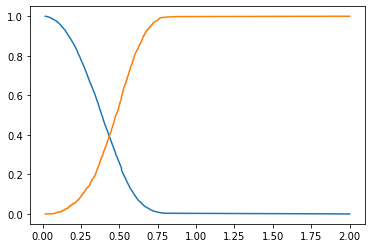

In [ ]:
roc = \
pd.DataFrame(roc_curve(y_score=res['SCORE1'].fillna(1),
                       y_true=res['SOCIAL_DEFAULT']))\
                       .T.rename(columns={0:'fpr', 1:'tpr', 2:'t'})

#plt.plot(roc['fpr'], roc['tpr'])
plt.plot(roc['t'], roc['fpr'])
plt.plot(roc['t'], 1-roc['tpr'])

In [ ]:
# пройти по трешхолдам, 

def get_boost_y(data, true, pred, treshold):
  tmp = t.loc[:, [true, pred]]
  tmp[true+'_'] = tmp[true].map(lambda x: -1 if x==0 else 1)
  tmp[pred+'_'] = (tmp[pred]>=treshold).map(lambda x: -1 if x==0 else 1)
  return ((tmp[true+'_'] * tmp[pred+'_'])==-1)* (tmp[true] - tmp[pred])

t = res[cls].replace(np.nan, -10)
l_y = ['SOCIAL_DEFAULT', 'FRAUD_DEFAULT','SCORE1', 'SCORE2', 'SCORE3', 'SCORE4']
treshold = 0.5

for i in range(1,5):
  t['SOC'+str(i)] = t['SOCIAL_DEFAULT'] - t['SCORE'+str(i)]
  t['SOC'+str(i)+'_'] = get_boost_y(t, 'SOCIAL_DEFAULT', 'SCORE'+str(i), treshold)
  l_y.append('SOC'+str(i))
  l_y.append('SOC'+str(i)+'_')

  t['FRD'+str(i)] = t['FRAUD_DEFAULT'] - t['SCORE'+str(i)]
  t['FRD'+str(i)+'_'] = get_boost_y(t, 'FRAUD_DEFAULT', 'SCORE'+str(i), treshold)
  l_y.append('FRD'+str(i))
  l_y.append('FRD'+str(i)+'_')

In [ ]:
l_y

['SOCIAL_DEFAULT',
 'FRAUD_DEFAULT',
 'SCORE1',
 'SCORE2',
 'SCORE3',
 'SCORE4',
 'SOC1',
 'SOC1_',
 'FRD1',
 'FRD1_',
 'SOC2',
 'SOC2_',
 'FRD2',
 'FRD2_',
 'SOC3',
 'SOC3_',
 'FRD3',
 'FRD3_',
 'SOC4',
 'SOC4_',
 'FRD4',
 'FRD4_']

In [ ]:
t[t['FRD2']!=0]['FRD2']

0       -0.464689
1       -0.464689
2       -0.425746
3       -0.426938
4       -0.426737
           ...   
15097   -0.404976
15098   -0.746033
15099   -0.386781
15100   -0.386781
15101   -0.307030
Name: FRD2, Length: 15102, dtype: float64

In [ ]:
X_full = t.loc[:, ~t.columns.isin(l_y)]
y_full = t.loc[:, t.columns.isin(l_y)]
label = 'FRD1'

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, 
                                                    test_size=0.3,
                                                    #stratify=y_full, 
                                                    random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train[label])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = y_test['SCORE1'] + model.predict(X_test)

0.8722223595015114


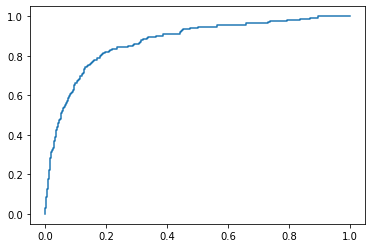

In [ ]:
print(roc_auc_score(y_score = y_pred,
                    y_true  = y_test['FRAUD_DEFAULT']))
roc = \
pd.DataFrame(\
    roc_curve(y_score = y_pred,
              y_true = y_test['FRAUD_DEFAULT']))\
    .T.rename(columns={0:'fpr', 1:'tpr', 2:'t'})

plt.plot(roc['fpr'], roc['tpr'])

In [ ]:
treshold = 0.2

pd.DataFrame(
              classification_report(
                        y_true = y_test['FRAUD_DEFAULT'],
                        y_pred = y_pred >= treshold ,
                        output_dict=True, digits=4)
            )

,0,1,accuracy,macro avg,weighted avg
precision,0.980713,0.268170,0.85522,0.624441,0.935736
recall,0.862426,0.748252,0.85522,0.805339,0.855220
f1-score,0.917774,0.394834,0.85522,0.656304,0.884766
support,4245.000000,286.000000,0.85522,4531.000000,4531.000000


In [ ]:
treshold = 0.4

tmp = pd.concat([X_test, y_test['FRAUD_DEFAULT'], y_pred.rename('pred')], axis=1)
tmp['pred'] = tmp['pred'] >= treshold
tmp['scored_amount'] = tmp['initial_payment_amount']
tmp.loc[tmp['pred'],'scored_amount'] = 0

tmp['initial_payment_amount'] = tmp['initial_payment_amount']/2
tmp['scored_amount'] = tmp['scored_amount']/2

ind_def = tmp['FRAUD_DEFAULT']==1

tmp.loc[ind_def,'initial_payment_amount'] = tmp.loc[ind_def,'initial_payment_amount']*(-3)
tmp.loc[ind_def,'scored_amount'] = tmp.loc[ind_def,'scored_amount']*(-3)

sc = tmp['scored_amount'].sum()/1e3
re = tmp['initial_payment_amount'].sum()/1e3

# Результаты

In [ ]:
sc-re, sc, re, (sc-re)/re

(931.6890000000003, 11530.8475, 10599.1585, 0.08790216695032915)

В ячейке выше видно что мы могли бы заработать 800к применив данную модель скоринга

Здесь есть еще много нюансов на которые следует обратить внимание – во-первых, нужно более детально оценить качество модели и возможнно обучить ее заново. Во-вторых классы в выборке очень несбалансированы, занчит имеет смысл сделать семплирование одного класса и выброс другого. В-третьих, в работе использовались простые модели без доп настройки. Большая часть результа получена благодаря feature engineering, на который ушла львиная доля всего времени

При этом есть еще очень много возможностей по работе с признаками что тоже должно улучшить модель